In [1]:
#Lakes Quarterly

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#Import CSV
WaterQuarterly = "QuarterlyLakeSamplingVersionProject.csv"


# Read 
LakeSample= pd.read_csv(WaterQuarterly)
LakeSample =LakeSample.dropna(how="any")

# Combine the data into a single dataset
LakeSample

,Site Name,Site Location,Cluster,Site Acronym,Mib(ng/L),Geosmin(ng/L),Cyclocitral(ng/L),TP (ug/L),DOC (mg/L),UVA(cm-1),Suva(L/mg-m),Conductance(us/cm),TDN (mg/L),date
0,APA1A,"Apache Lake, upper",srp,"Apache, epi, upper",0.540000,0.790000,0.000000,62.0,5.500,0.030,0.800000,1102,0.3000,2/15/2012
1,APA1B,"Apache Lake, upper",srp,"Apache, hypo, upper",6.500000,0.000000,0.000000,14.0,3.800,0.030,0.800000,1114,0.3000,2/15/2012
2,APA2A,"Apache Lake, lower",srp,"Apache, epi, lower",0.700000,1.000000,0.000000,10.0,5.500,0.060,1.200000,1202,0.4000,2/15/2012
3,APA2B,"Apache Lake, lower",srp,"Apache, hypo, lower",0.600000,1.000000,0.000000,18.0,3.900,0.030,0.800000,1101,0.4000,2/15/2012
4,Can1A,"Canyon Lake, upper",srp,"Canyon, epi, upper",1.100000,0.790000,0.000000,62.0,3.800,0.030,0.800000,1102,0.3000,2/15/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Can2B,"Canyon Lake, lower",srp,"Canyon, hypo, lower",-0.815197,-0.698338,-1.101629,4.0,2.930,0.094,3.208191,1787,0.3996,2/3/2016
172,Roos1A,"Roosevelt Lake, upper",srp,"Roosevelt, eppi, upper",2.882506,-0.698338,-1.101629,6.0,2.496,0.085,3.405449,1879,0.2637,2/3/2016
173,Roos1B,"Roosevelt Lake, upper",srp,"Roosevelt, hypo, upper",1.875843,-0.698338,-1.101629,0.0,2.517,0.081,3.218117,1884,0.3260,2/3/2016
174,Roos2A,"Roosevelt Lake, lower",srp,"Roosevelt, eppi, lower",2.874579,-0.698338,-1.101629,0.0,2.359,0.071,3.009750,1914,0.2798,2/3/2016


In [3]:
# Always print the colums on scientific documents as they can be tricky with the spelling and 
#added measurements. 




LakeSample.columns

Index(['Site Name', 'Site Location', 'Cluster', 'Site Acronym', 'Mib(ng/L)',
       'Geosmin(ng/L)', 'Cyclocitral(ng/L)', 'TP (ug/L)', 'DOC (mg/L)',
       'UVA(cm-1)', 'Suva(L/mg-m)', 'Conductance(us/cm)', 'TDN (mg/L)',
       'date'],
      dtype='object')

In [4]:
#Condensing the list of variables that I will be dealing with.

LakeStats = LakeSample.loc[:, ["Site Location", "DOC (mg/L)", "TP (ug/L)","Conductance(us/cm)","TDN (mg/L)","date"]]
LakeStats

,Site Location,DOC (mg/L),TP (ug/L),Conductance(us/cm),TDN (mg/L),date
0,"Apache Lake, upper",5.500,62.0,1102,0.3000,2/15/2012
1,"Apache Lake, upper",3.800,14.0,1114,0.3000,2/15/2012
2,"Apache Lake, lower",5.500,10.0,1202,0.4000,2/15/2012
3,"Apache Lake, lower",3.900,18.0,1101,0.4000,2/15/2012
4,"Canyon Lake, upper",3.800,62.0,1102,0.3000,2/15/2012
...,...,...,...,...,...,...
171,"Canyon Lake, lower",2.930,4.0,1787,0.3996,2/3/2016
172,"Roosevelt Lake, upper",2.496,6.0,1879,0.2637,2/3/2016
173,"Roosevelt Lake, upper",2.517,0.0,1884,0.3260,2/3/2016
174,"Roosevelt Lake, lower",2.359,0.0,1914,0.2798,2/3/2016


In [5]:
#Tested the total dissolved nitrogen as a factor to chart but decided on conductance instead.
#This was part of the exploratory part of the journey. 

                  # TOTAL DISSOLVED NITROGEN
    
LakeMean=LakeStats.groupby(["Site Location"]).mean()["TDN (mg/L)"]

LakeMedian= LakeStats.groupby(["Site Location"]).median()["TDN (mg/L)"]

LakeVar= LakeStats.groupby(["Site Location"]).var()["TDN (mg/L)" ]

Lakestd= LakeStats.groupby(["Site Location"]).std()["TDN (mg/L)"]

Lakesem= LakeStats.groupby(["Site Location"]).sem()["TDN (mg/L)"]



LakeStats_DF=pd.DataFrame({ "Mean": LakeMean,  
                              "Median": LakeMedian,
                              "Variance":LakeVar,
                               "SD":Lakestd,
                               "SEM":Lakesem})

LakeStats_DF


,Mean,Median,Variance,SD,SEM
Site Location,,,,,
"Apache Lake, lower",0.341999,0.365750,0.006943,0.083323,0.015747
"Apache Lake, upper",0.342731,0.340000,0.009995,0.099977,0.017956
"Canyon Lake, lower",0.363775,0.364670,0.005945,0.077105,0.014077
"Canyon Lake, upper",0.384777,0.380000,0.008418,0.091750,0.016479
"Roosevelt Lake, lower",0.335990,0.340112,0.011481,0.107149,0.020249
"Roosevelt Lake, upper",0.345350,0.309799,0.023803,0.154282,0.029156


In [6]:
# I setteled on conductance because I read that this is something that can be a warning sign of 
# pollution. (If the conductance test was performed accurately with temperature compensation)
#      Conductance


LakeMean=LakeStats.groupby(["Site Location"]).mean()["Conductance(us/cm)"]

LakeMedian= LakeStats.groupby(["Site Location"]).median()["Conductance(us/cm)"]

LakeVar= LakeStats.groupby(["Site Location"]).var()["Conductance(us/cm)" ]

Lakestd= LakeStats.groupby(["Site Location"]).std()["Conductance(us/cm)"]

Lakesem= LakeStats.groupby(["Site Location"]).sem()["Conductance(us/cm)"]



LakeStats_DF=pd.DataFrame({ "Mean": LakeMean,  
                              "Median": LakeMedian,
                              "Variance":LakeVar,
                               "SD":Lakestd,
                               "SEM":Lakesem})

LakeStats_DF




,Mean,Median,Variance,SD,SEM
Site Location,,,,,
"Apache Lake, lower",1582.750000,1607.5,80925.379630,284.473865,53.760507
"Apache Lake, upper",1571.677419,1612.0,85721.292473,292.781988,52.585197
"Canyon Lake, lower",1522.266667,1583.5,81985.995402,286.331967,52.276826
"Canyon Lake, upper",1506.709677,1574.0,73422.746237,270.966319,48.666988
"Roosevelt Lake, lower",1651.857143,1609.5,58805.904762,242.499288,45.828058
"Roosevelt Lake, upper",1724.178571,1684.0,52733.411376,229.637565,43.397421


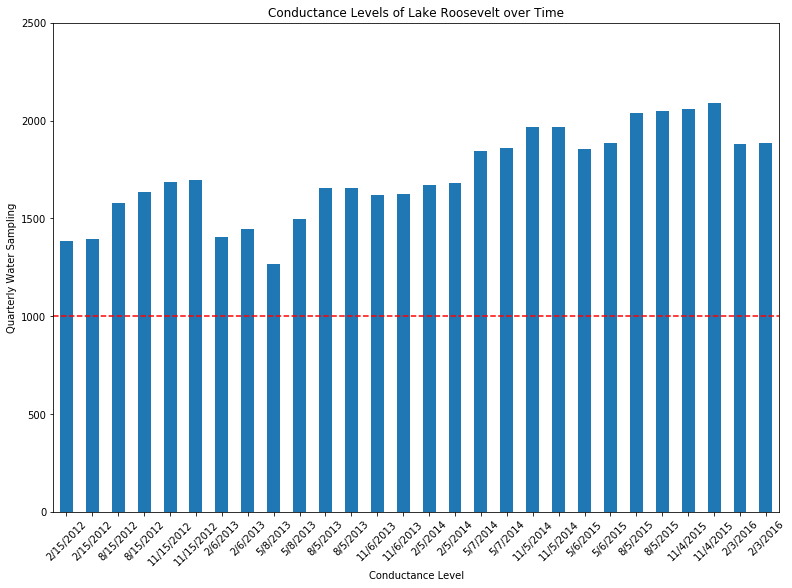

<Figure size 432x288 with 0 Axes>

In [54]:
# Now to chart the Conductance level in one lake over the course of the four years.



LakeStats


LakeStatsRoosevelt= LakeStats.loc[LakeStats["Site Location"] == "Roosevelt Lake, upper"]
LakeStatsRoosevelt

plt.figure(figsize=(13,9)) 
Datapoints = LakeStatsRoosevelt["Conductance(us/cm)"]
Datapoints.plot(kind = "bar")
x_axis = np.arange(len(LakeStatsRoosevelt))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,LakeStatsRoosevelt["date"])
plt.xticks(rotation=45)
plt.title("Conductance Levels of Lake Roosevelt over Time")
plt.xlabel("Conductance Level")
plt.ylabel("Quarterly Water Sampling")
plt.ylim(0,2500)
plt.axhline(y=1000, c='red', linestyle='dashed', label="horizontal")
plt.show()
plt.savefig('RooseveltLakeStat.png')


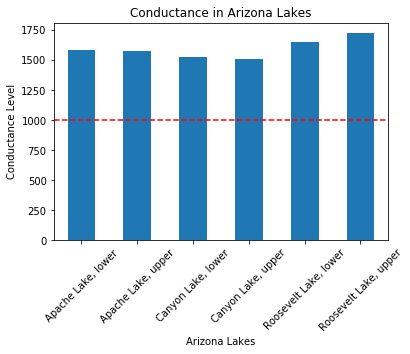

<Figure size 432x288 with 0 Axes>

In [55]:
#Finally to show that what is going on with Roosevelt is not unique to Roosevelt although Roosevelt 
#seems to have the highest level of Conductance for the time period being tested.

Lake_Means= LakeStats_DF['Mean']

LakeM = Lake_Means.plot(kind="bar", title="Conductance in Arizona Lakes")
LakeM.set_xlabel("Arizona Lakes")
LakeM.set_ylabel("Conductance Level")
plt.xticks(rotation=45)
plt.axhline(y=1000, c='red', linestyle='dashed', label="horizontal")
plt.show()
plt.tight_layout()
plt.savefig('LakesDrill.png')